In [3]:
import stanfordnlp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import indicnlp
from indicnlp.tokenize import indic_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from scipy import interpolate
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib as mpl
from sklearn.manifold import TSNE

In [4]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी',
				'बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 
				'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 
				'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 
				'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 
				'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 
				'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 
				'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 
				'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 
				'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 
				'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 
				'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 
				'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 
				'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 
				'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 
				'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 
				'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 
				'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']


punctuations = ['nn','n', '।','/', '`', '+', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']',
				 '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']

to_be_removed = stopwords_hi + punctuations

In [5]:
data = pd.read_csv('hi-train.csv')

In [6]:
data.head()

,class,news
0,india,मेट्रो की इस लाइन के चलने से दक्षिणी दिल्ली से...
1,pakistan,नेटिजन यानि इंटरनेट पर सक्रिय नागरिक अब ट्विटर...
2,news,इसमें एक फ़्लाइट एटेनडेंट की मदद की गुहार है औ...
3,india,"प्रतीक खुलेपन का, आज़ाद ख्याली का और भीड़ से अ..."
4,india,ख़ासकर पिछले 10 साल तक प्रधानमंत्री रहे मनमोहन...


In [7]:
data[' news'][0]

'मेट्रो की इस लाइन के चलने से दक्षिणी दिल्ली से नोएडा जाने का समय काफी कम हो जाएगा और यात्रियों को राजीव चौक या मंडी हाउस से होकर नहीं जाना पड़ेगा.लेकिन, यह मजेंटा लाइन इसलिए भी महत्वपूर्ण है क्योंकि इस पर ड्राइवलैस यानी बिना ड्राइवर वाली मेट्रो चलाने की योजना है. ऐसा भारत में पहली बार होगा जब कोई मेट्रो बिना ड्राइवर के चलाई जाएगी. मेट्रो के तीसरे फेज में भारत में पहली बार ड्राइवरलेस तकनीक आएगी लेकिन दुनिया भर में कई देशों में ड्राइवरलेस मेट्रो पहले से ही चलती हैं. इन देशों में ड्राइवरलेस मेट्रो सफल भी रही हैं. दक्षिण कोरिया की राजधानी सोल में ड्राइवलेस ट्रेन कामयाबी से चल रही है. ये मेट्रो ज़मीन के नीचे चलती है इसमें ड्राइवर का केबिन भी नहीं होता है. यूरोप में डेनमार्क, स्पेन, इटली, फ्रांस, जर्मनी, हंगरी, स्विट्जरलैंड और ब्रिटेन में भी ड्राइवरलैस मेट्रो चलती है. इन देशों में एक से ज़्यादा शहरों में भी ऐसी मेट्रो चलाई जाती है. इनके अलावा अमेरिका और कनाडा में भी ड्राइवरलेस ट्रेन चलती है. वहीं, ब्राजील, पेरू और चाइल में भी इस तरह की मेट्रो काफ़ी पहले आ चुकी है. भारत के पड़ोसी देश चीन में

In [8]:
data['class'].unique()

array(['india', 'pakistan', 'news', 'international', 'entertainment',
       'sport', 'science', 'china', 'learningenglish', 'social',
       'southasia', 'business', 'institutional', 'multimedia'],
      dtype=object)

In [9]:
len(data)

3467

In [10]:
documents = data[' news']

# documents = pd.read_csv('hin.txt',sep='\t')

# documents = documents['Hindi']

In [ ]:
nlp = stanfordnlp.Pipeline(lang='hi',processors='tokenize,lemma')

lemmatized_tokens = []

for doc in tqdm(documents):
    for sentence in nlp(doc).sentences:
        lemmatized_tokens.append([word.lemma for word in sentence.words])

In [12]:
def dummy_fun(doc):
	return doc

In [13]:
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=indic_tokenize.trivial_tokenize,
    preprocessor=dummy_fun,
    token_pattern=None,
    stop_words = to_be_removed,
    max_features = 2048)

X = vectorizer.fit_transform(documents)

In [14]:
labels_color_map = {0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#008fd5', 4: '#fc4f30', 5: '#e5ae38', 
					6: '#6d904f', 7: '#8b8b8b', 8: '#810f7c'}

n_clusters = 8

In [15]:
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

labels = model.predict(X)

In [16]:
X_dense = X.todense()

X_reduced = PCA(n_components = 2).fit_transform(X_dense)

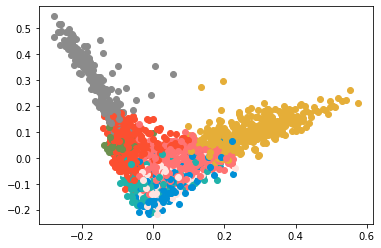

In [14]:
fig, ax = plt.subplots()
for index, instance in enumerate(X_reduced):
	pca_comp_1, pca_comp_2 = X_reduced[index]
	color = labels_color_map[labels[index]]
	ax.scatter(pca_comp_1, pca_comp_2, c=color)

    
plt.show()

In [17]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n_clusters):
	print("Cluster %d:" % i),
	for ind in order_centroids[i, :5]:
		print(terms[ind])

print("\n")

Top terms per cluster:
Cluster 0:
मोदी
पार्टी
चुनाव
कांग्रेस
भाजपा
Cluster 1:
पुलिस
लोगों
बताया
गए
गई
Cluster 2:
वो
उन्होंने
साल
लोगों
लोग
Cluster 3:
फ़िल्म
फिल्म
वो
फ़िल्मों
फ़िल्में
Cluster 4:
अमरीका
चीन
अमरीकी
राष्ट्रपति
ओबामा
Cluster 5:
पाकिस्तान
सरकार
अदालत
कोर्ट
मामले
Cluster 6:
कंपनी
लोगों
इस्तेमाल
साल
भारत
Cluster 7:
रन
मैच
टीम
विकेट
पारी




In [18]:
mpl.rcParams['font.sans-serif'] = ['Source Han Sans TW',
                                   'sans-serif',
                                   'FreeSerif'  # fc-list :lang=hi family
                                   ]

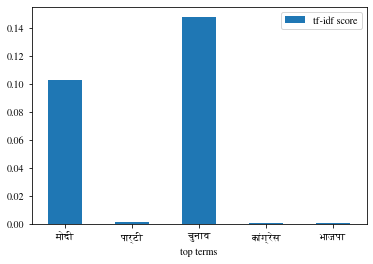

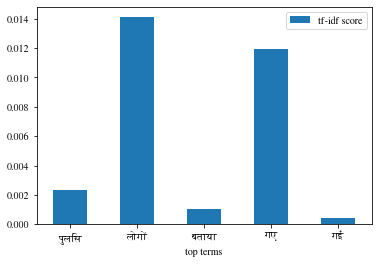

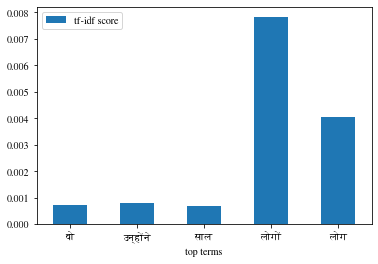

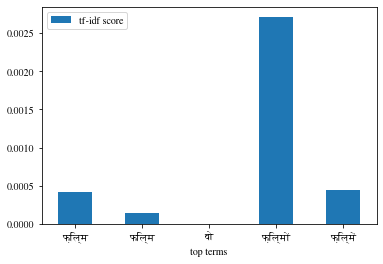

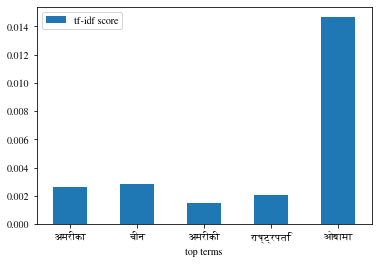

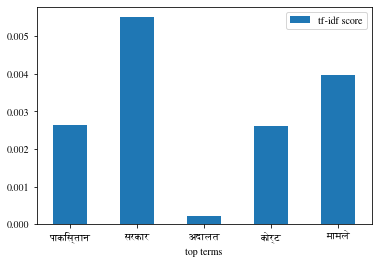

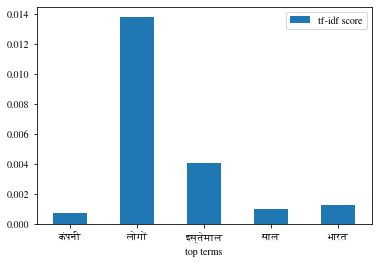

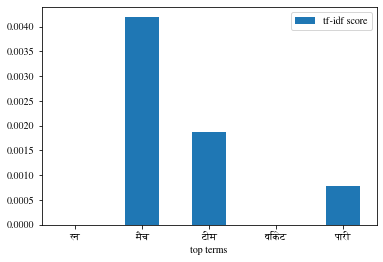

In [19]:
scores_array = model.cluster_centers_[:, ::-1]
dfs=[]

for i in range(n_clusters):
    top_terms = []
    for ind in order_centroids[i, :5]:
        top_terms.append((terms[ind], scores_array[i, ind]))
    df = pd.DataFrame(top_terms, columns = ['top terms', 'tf-idf score'])
    ax = df.plot.bar(x='top terms', y='tf-idf score', rot=0)
    dfs.append(df)

In [24]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne  = tsne.fit_transform(X_dense)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3467 samples in 3.542s...
[t-SNE] Computed neighbors for 3467 samples in 89.622s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3467
[t-SNE] Computed conditional probabilities for sample 2000 / 3467
[t-SNE] Computed conditional probabilities for sample 3000 / 3467
[t-SNE] Computed conditional probabilities for sample 3467 / 3467
[t-SNE] Mean sigma: 0.326173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.095100
[t-SNE] KL divergence after 300 iterations: 2.413360


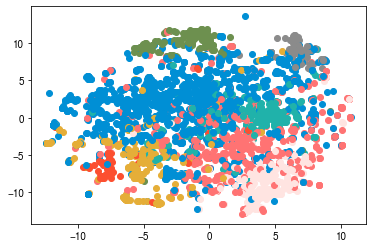

In [25]:
fig, ax = plt.subplots()
for index, instance in enumerate(X_tsne):
	tsne_comp_1, tsne_comp_2 = X_tsne[index]
	color = labels_color_map[labels[index]]
	ax.scatter(tsne_comp_1, tsne_comp_2, c=color)

    
plt.show()

In [13]:
from inltk.inltk import setup
from inltk.inltk import tokenize
from inltk.inltk import get_embedding_vectors

# setup('hi')

example_sent = "बहुत समय से मिले नहीं"

# Tokenize the sentence
example_sent_tokens = tokenize(example_sent,'hi')
# Get the embedding vector for each token
example_sent_vectors = get_embedding_vectors(example_sent, 'hi')

In [10]:
len(example_sent_vectors)

5

In [11]:
example_sent_vectors[0].shape

(400,)

In [25]:
terms = []

for df in dfs:
    terms += list(df['top terms'])

terms_str = ' '.join(terms)

embed_vecs = get_embedding_vectors(terms_str, 'hi')

In [26]:
embed_reduced = PCA(n_components = 2).fit_transform(embed_vecs)

In [27]:
embed_reduced.shape

(40, 2)

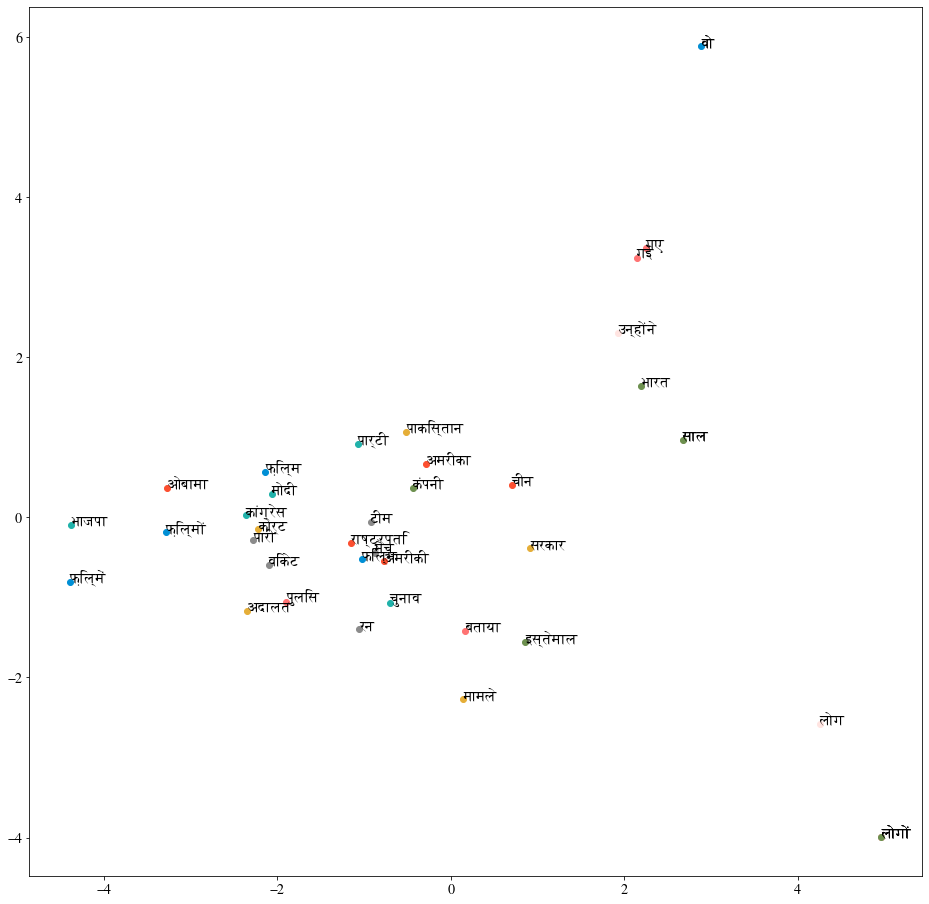

In [35]:
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(16, 16))
for i in range(40):
    color = labels_color_map[int(i/5)]
    ax.scatter(embed_reduced[i,0], embed_reduced[i,1], c=color)
    ax.annotate(terms[i], xy = (embed_reduced[i,0], embed_reduced[i,1]))
    
plt.show()

In [36]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
embed_tsne  = tsne.fit_transform(embed_vecs)

[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.617s...
[t-SNE] Computed neighbors for 40 samples in 2.943s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.139603
[t-SNE] KL divergence after 300 iterations: 0.626324


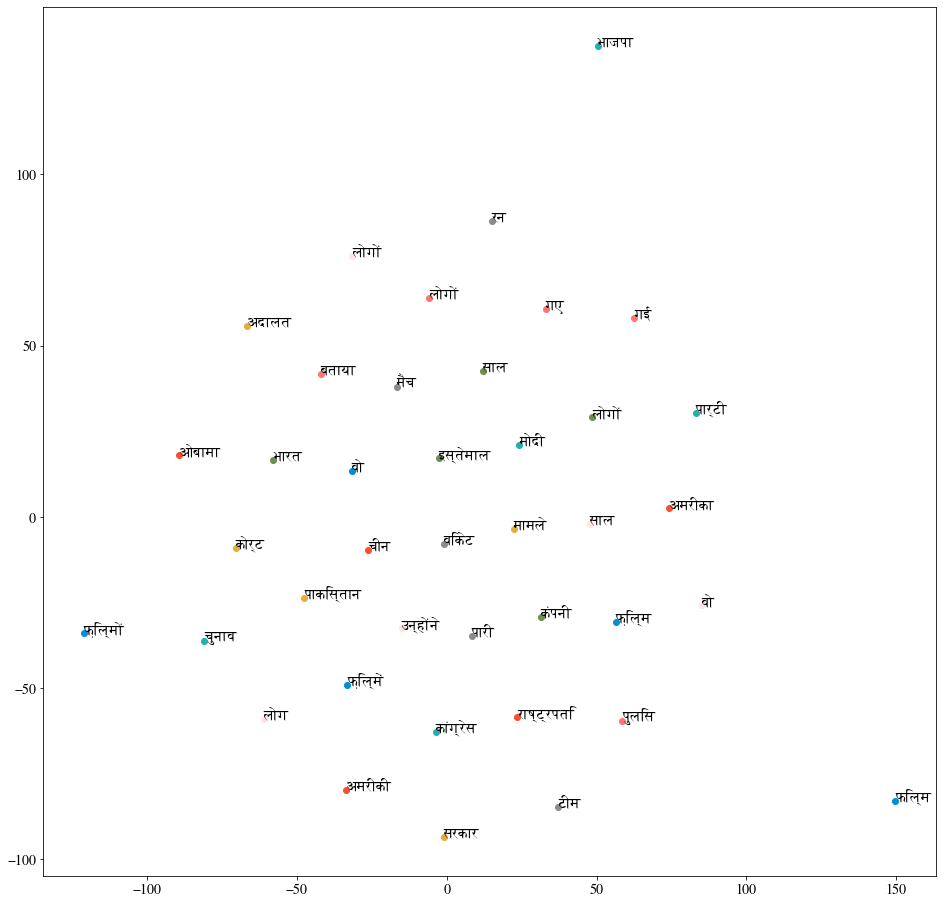

In [37]:
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(16, 16))
for i in range(40):
    color = labels_color_map[int(i/5)]
    ax.scatter(embed_tsne[i,0], embed_tsne[i,1], c=color)
    ax.annotate(terms[i], xy = (embed_tsne[i,0], embed_tsne[i,1]))
    
plt.show()

In [38]:
documents

0       मेट्रो की इस लाइन के चलने से दक्षिणी दिल्ली से...
1       नेटिजन यानि इंटरनेट पर सक्रिय नागरिक अब ट्विटर...
2       इसमें एक फ़्लाइट एटेनडेंट की मदद की गुहार है औ...
3       प्रतीक खुलेपन का, आज़ाद ख्याली का और भीड़ से अ...
4       ख़ासकर पिछले 10 साल तक प्रधानमंत्री रहे मनमोहन...
                              ...                        
3462    जैसे ही उन्हें पता चलता है कि कोई व्यक्ति परेश...
3463    जैसे ही सदन की कार्यवाही शुरू हुई तमिलनाडु की ...
3464    चीन ने पिछले हफ़्ते अप्रत्यक्ष रूप से भारत को ...
3465    मुक्ता आर्ट्स की 'कांची' कहानी है एक ख़ूबसूरत ...
3466    फॉक्स स्टार स्टूडियोज़ और विशेष फ़िल्म्स की सि...
Name:  news, Length: 3467, dtype: object

In [40]:
import time

begin = time.time()

embed_vec = get_embedding_vectors(documents[0], 'hi')

end = time.time()

print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 10.030605554580688


In [11]:
data_small = documents[:20]

In [14]:
embed_vecs_all = []
for data in tqdm(data_small):
    embed_vecs_all.append(get_embedding_vectors(data, 'hi'))

  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:00<00:18,  1.03it/s]

 10%|█         | 2/20 [00:01<00:16,  1.06it/s]

 15%|█▌        | 3/20 [00:02<00:15,  1.10it/s]

 20%|██        | 4/20 [00:03<00:14,  1.11it/s]

 25%|██▌       | 5/20 [00:04<00:13,  1.09it/s]

 30%|███       | 6/20 [00:05<00:12,  1.11it/s]

 35%|███▌      | 7/20 [00:06<00:11,  1.10it/s]

 40%|████      | 8/20 [00:07<00:10,  1.10it/s]

 45%|████▌     | 9/20 [00:08<00:10,  1.10it/s]

 50%|█████     | 10/20 [00:09<00:09,  1.10it/s]

 55%|█████▌    | 11/20 [00:10<00:08,  1.07it/s]

 60%|██████    | 12/20 [00:11<00:07,  1.06it/s]

 65%|██████▌   | 13/20 [00:12<00:06,  1.03it/s]

 70%|███████   | 14/20 [00:13<00:06,  1.00s/it]

 75%|███████▌  | 15/20 [00:14<00:04,  1.02it/s]

 80%|████████  | 16/20 [00:15<00:03,  1.04it/s]

 85%|████████▌ | 17/20 [00:16<00:03,  1.00s/it]

 90%|█████████ | 18/20 [00:17<00:01,  1.03it/s]

 95%|█████████▌| 19/20 [00:17<00:00,  1.05it/s]

100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


In [26]:
mean_embed_vecs = [np.mean(vec, axis=0) for vec in embed_vecs_all]

In [29]:
mean_embed_reduced = PCA(n_components = 2).fit_transform(mean_embed_vecs)

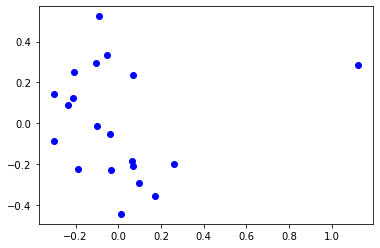

In [32]:
fig, ax = plt.subplots()
for i in range(20):
    ax.scatter(mean_embed_reduced[i,0], mean_embed_reduced[i,1], color = 'b')
    
plt.show()

In [33]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
mean_embed_tsne  = tsne.fit_transform(mean_embed_vecs)

[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 20 samples in 0.003s...
[t-SNE] Computed neighbors for 20 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 20 / 20
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.105011
[t-SNE] KL divergence after 300 iterations: 0.426816


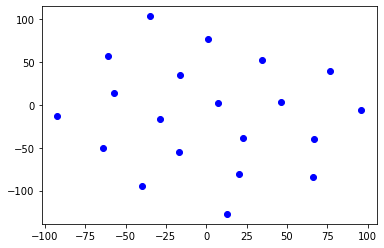

In [34]:
fig, ax = plt.subplots()
for i in range(20):
    ax.scatter(mean_embed_tsne[i,0], mean_embed_tsne[i,1], color='b')
    
plt.show()